In [48]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [49]:
df = pd.read_csv("playstore.csv") #reading the data

In [50]:
df.shape #tells us the shape of the data

(10841, 13)

In [51]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [53]:
#

In [54]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [55]:
#Data Preparation

In [56]:
df.isnull().sum() #shows if there are any missing values

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [57]:
df.dropna(subset=['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver'], inplace=True)

In [58]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


In [61]:
df["Reviews"].describe()

count     9360
unique    5990
top          2
freq        83
Name: Reviews, dtype: object

In [62]:
df["Reviews"] = df["Reviews"].astype("int64")

In [63]:
df["Reviews"].describe().round()

count        9360.0
mean       514377.0
std       3145023.0
min             1.0
25%           187.0
50%          5955.0
75%         81628.0
max      78158306.0
Name: Reviews, dtype: float64

In [64]:
print(len(df["Size"].unique()))
df["Size"].unique()

413


array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [65]:
df["Size"].replace("M","", regex=True, inplace = True)
df["Size"].replace("k","", regex=True, inplace = True)

In [66]:
df["Size"].unique()

array(['19', '14', '8.7', '25', '2.8', '5.6', '29', '33', '3.1', '28',
       '12', '20', '21', '37', '5.5', '17', '39', '31', '4.2', '23',
       '6.0', '6.1', '4.6', '9.2', '5.2', '11', '24',
       'Varies with device', '9.4', '15', '10', '1.2', '26', '8.0', '7.9',
       '56', '57', '35', '54', '201', '3.6', '5.7', '8.6', '2.4', '27',
       '2.7', '2.5', '7.0', '16', '3.4', '8.9', '3.9', '2.9', '38', '32',
       '5.4', '18', '1.1', '2.2', '4.5', '9.8', '52', '9.0', '6.7', '30',
       '2.6', '7.1', '22', '6.4', '3.2', '8.2', '4.9', '9.5', '5.0',
       '5.9', '13', '73', '6.8', '3.5', '4.0', '2.3', '2.1', '42', '9.1',
       '55', '7.3', '6.5', '1.5', '7.5', '51', '41', '48', '8.5', '46',
       '8.3', '4.3', '4.7', '3.3', '40', '7.8', '8.8', '6.6', '5.1', '61',
       '66', '79', '8.4', '3.7', '118', '44', '695', '1.6', '6.2', '53',
       '1.4', '3.0', '7.2', '5.8', '3.8', '9.6', '45', '63', '49', '77',
       '4.4', '70', '9.3', '8.1', '36', '6.9', '7.4', '84', '97', '2.0',
  

In [68]:
size_median = df[df["Size"]!="Varies with device"]["Size"].astype(float).median()
df["Size"].replace("Varies with device", size_median, inplace=True)
df.Size = pd.to_numeric(df.Size)
df.Size.head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [69]:
df.Size.describe().round()

count    9360.0
mean       34.0
std        85.0
min         1.0
25%         8.0
50%        16.0
75%        30.0
max       994.0
Name: Size, dtype: float64

In [70]:
#Installs
df["Installs"].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [71]:
df.Installs = df.Installs.apply(lambda x:x.replace("+",""))
df.Installs = df.Installs.apply(lambda x:x.replace(",",""))
df.Installs = df.Installs.apply(lambda x:int(x))

In [72]:
df["Installs"].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,        100,        500,
               10,          5,         50,          1])

In [73]:
#Price
df["Price"].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [74]:
df.Price = df.Price.apply(lambda x:x.replace("$",""))
df.Price = df.Price.apply(lambda x:float(x))

In [75]:
df["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

In [76]:
df["Genres"] = df["Genres"].str.split(";").str[0]

In [77]:
df["Genres"].replace("Music & Audio", "Music", inplace =True)

In [79]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

In [80]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design,2018-06-20,1.1,4.4 and up


Text(0.5, 1.0, 'Free & Paid')

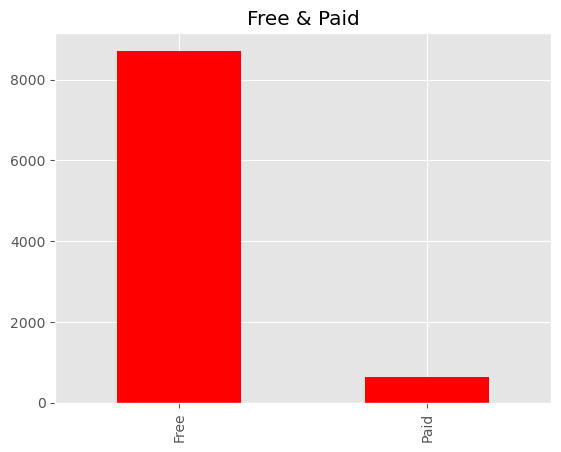

In [81]:
#Plot Bar Graph for the different types of apps

df["Type"].value_counts().plot(kind="bar", color ="red")
plt.title("Free & Paid")

Text(0.5, 1.0, 'Content rating with their counts')

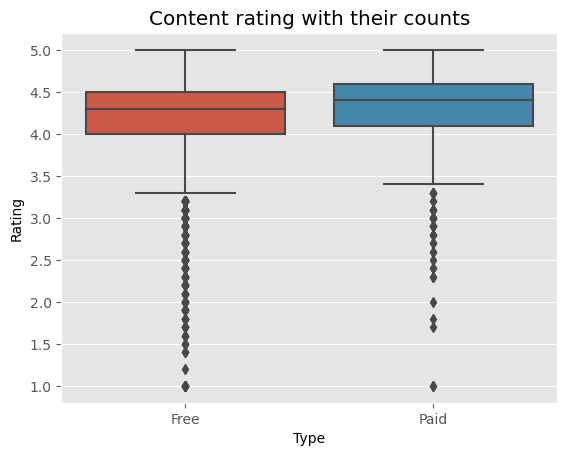

In [82]:
sns.boxplot(x = "Type", y = "Rating", data = df)
plt.title("Content rating with their counts")

Text(0.5, 1.0, 'Content rating with their counts')

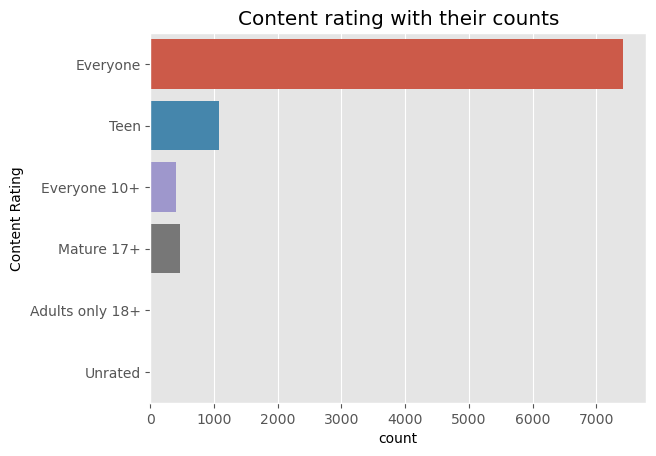

In [84]:
#Bar plot for the rating column with the number of the categories
sns.countplot(y = "Content Rating", data = df)
plt.title("Content rating with their counts")

Text(0.5, 1.0, 'The content rating & rating')

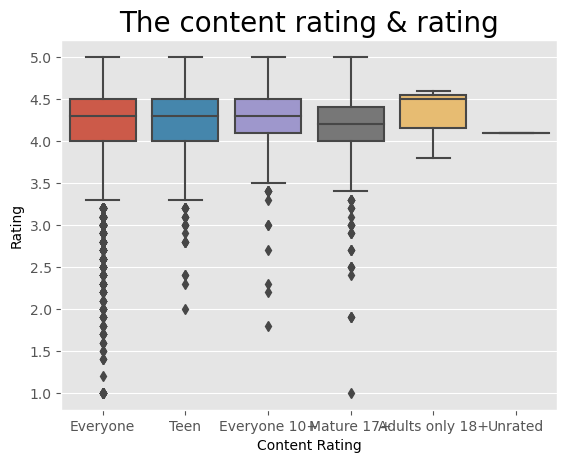

In [86]:
sns.boxplot(x = "Content Rating", y = "Rating", data = df)
plt.title("The content rating & rating", size=20)

Text(0.5, 1.0, 'The number of categories')

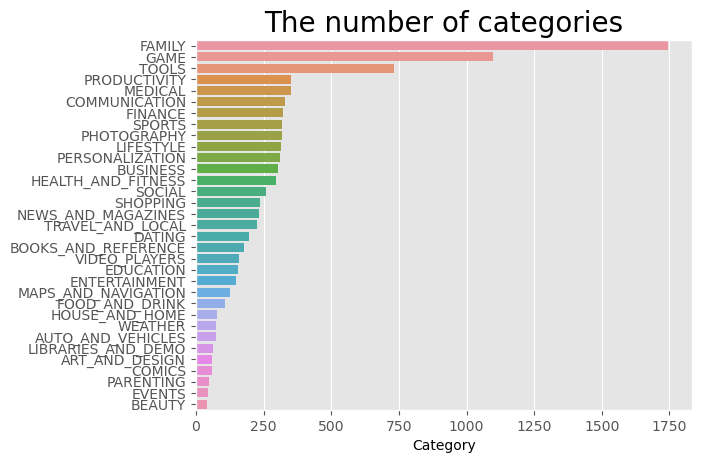

In [87]:
cat_num = df["Category"].value_counts()
sns.barplot(x = cat_num, y = cat_num.index, data = df)
plt.title("The number of categories", size=20)

Text(0.5, 1.0, 'Category & Price')

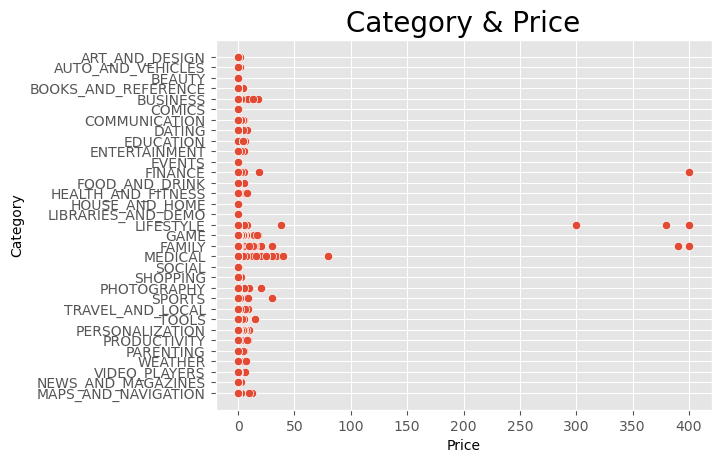

In [88]:
sns.scatterplot(data = df, y = "Category", x = "Price")
plt.title("Category & Price", size=20)

/var/folders/jz/kl0tr9vx3n5g4q6dmq18q7280000gn/T/ipykernel_18162/622182597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt=".2f")


Text(0.5, 1.0, 'Heatmap for numerical columns')

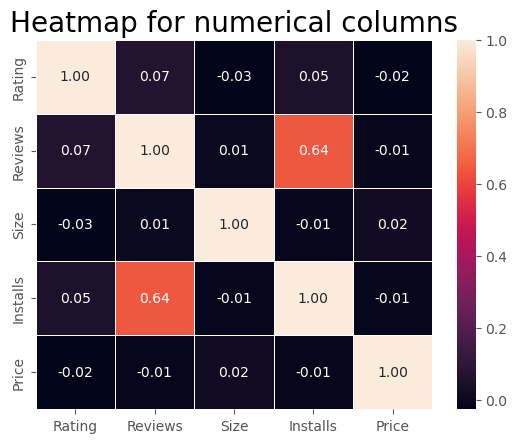

In [89]:
#Heat map for numerical columns
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt=".2f")
plt.title("Heatmap for numerical columns", size=20)

Text(0.5, 1.0, 'Histogram with the kde for the rating column ')

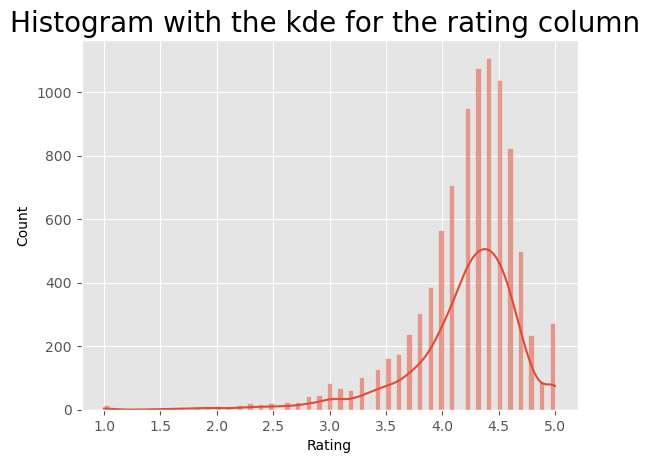

In [90]:
#histogram with kde for the ratings
sns.histplot(df["Rating"], kde = True)
plt.title("Histogram with the kde for the rating column ", size=20,)

Text(0, 0.5, 'Number of Apps')

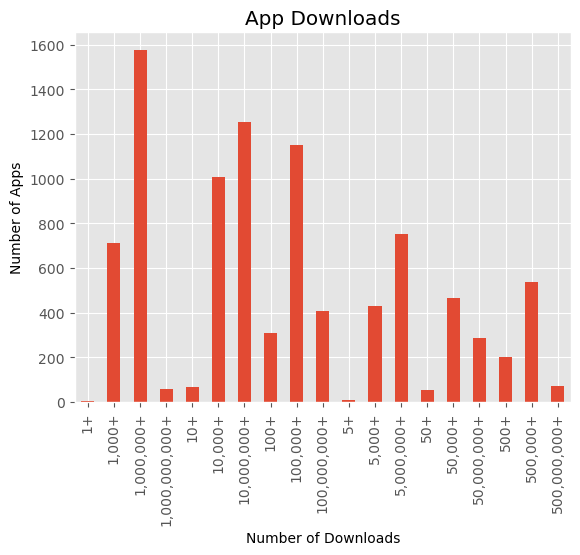

In [19]:
ax = df['Installs'].value_counts().sort_index(ascending=True) \
    .plot(kind='bar', title='App Downloads')

ax.set_xlabel('Number of Downloads')
ax.set_ylabel('Number of Apps')

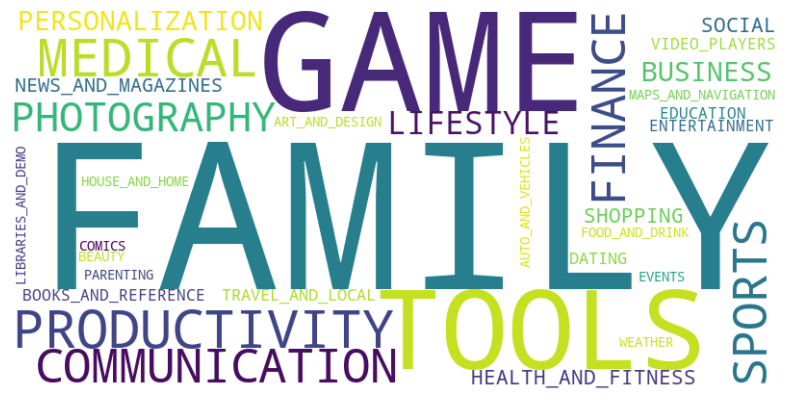

In [92]:
category_counts = df['Category'].value_counts()

# Create a text with category frequencies
text = ' '.join([f'{category}: {count}' for category, count in category_counts.items()])

# Create a WordCloud object
wordcloud = WordCloud(background_color='white', width=800, height=400).generate_from_text(text)

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the word bubble using scatter plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

# Show the word bubble
plt.show()

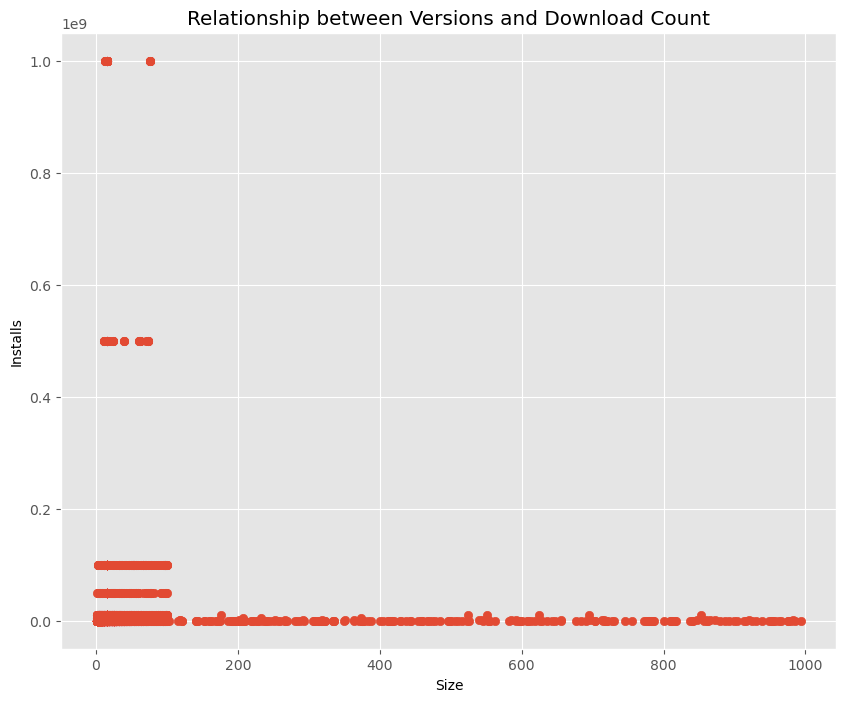

In [98]:


# Assuming 'df' is your DataFrame and 'Release Date' and 'Download Count' are the relevant columns

# Convert the 'Release Date' column to a numerical format
#df['Release Date'] = pd.to_numeric(df['Release Date'], errors='coerce')

# Create a scatter plot to analyze the relationship
plt.figure(figsize=(10, 8))
plt.scatter(df['Size'], df['Installs'])
plt.xlabel('Size')
plt.ylabel('Installs')
plt.title('Relationship between Versions and Download Count')
plt.show()


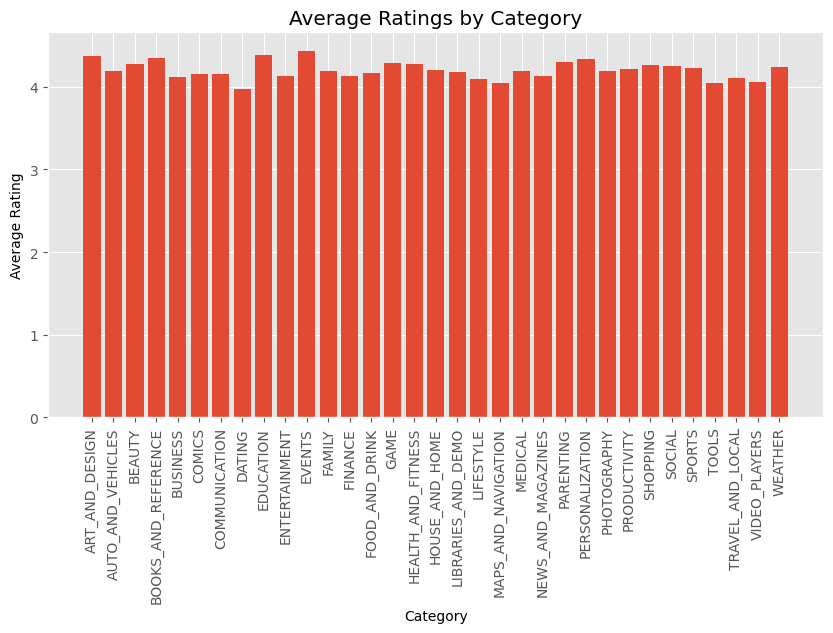

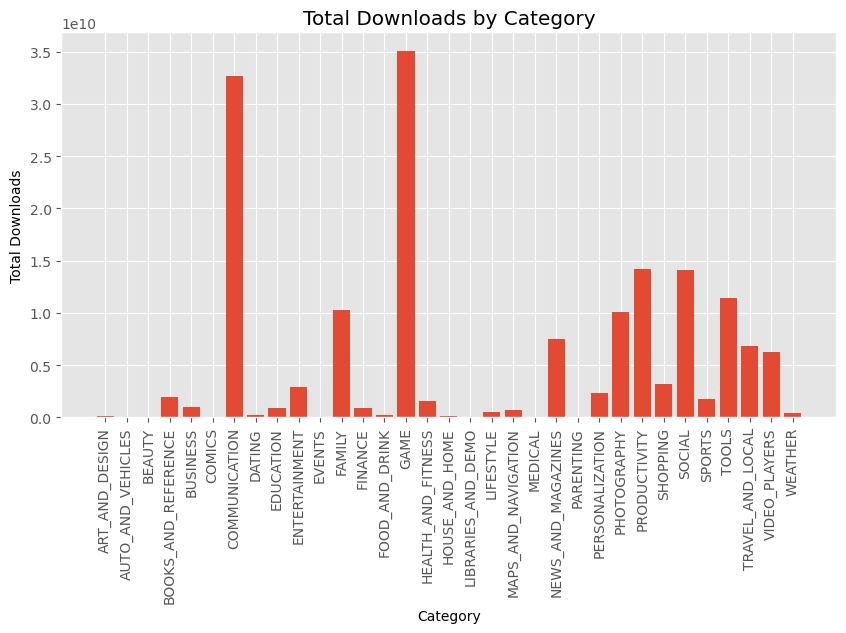

In [99]:


# Assuming 'df' is your DataFrame and 'Category', 'Rating', and 'Installs' are the relevant columns

# Calculate the average ratings for each category
average_ratings = df.groupby('Category')['Rating'].mean()

# Calculate the total download counts for each category
total_downloads = df.groupby('Category')['Installs'].sum()

# Create a bar plot for average ratings
plt.figure(figsize=(10, 5))
plt.bar(average_ratings.index, average_ratings.values)
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Category')
plt.xticks(rotation=90)
plt.show()

# Create a bar plot for total download counts
plt.figure(figsize=(10, 5))
plt.bar(total_downloads.index, total_downloads.values)
plt.xlabel('Category')
plt.ylabel('Total Downloads')
plt.title('Total Downloads by Category')
plt.xticks(rotation=90)
plt.show()


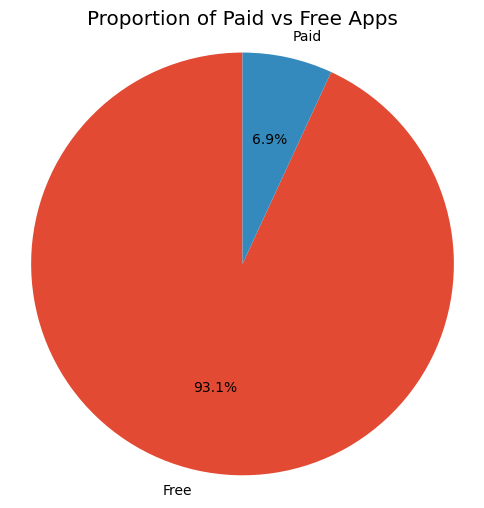

In [100]:


# Assuming 'df' is your DataFrame and 'Type' is the column indicating app type (paid or free)

# Calculate the count of paid and free apps
app_counts = df['Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(app_counts, labels=app_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Paid vs Free Apps')
plt.axis('equal')

# Display the pie chart
plt.show()


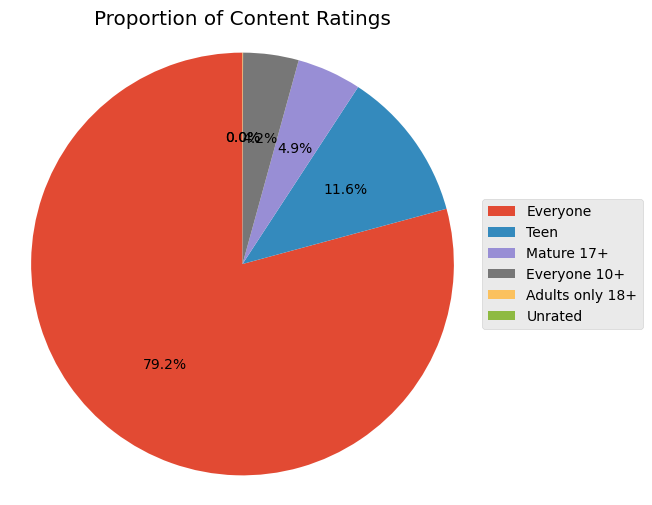

In [105]:


# Assuming 'df' is your DataFrame and 'Content Rating' is the column indicating app content rating

# Calculate the count of each content rating
app_counts = df['Content Rating'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(app_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Content Ratings')
plt.axis('equal')

# Create a separate key using legend
plt.legend(labels=app_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Display the pie chart
plt.show()
